In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import linear_model
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import requests

In [40]:
def configurar_plot_com_dimensoes(titulo, x, y, h, w):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(h, w)
    plt.show()

In [41]:
def configurar_plot(titulo, x, y):
    configurar_plot_com_dimensoes(titulo, x, y, 16, 8)

In [49]:
df = pd.read_csv('dados/Most Popular Programming Languages from 2004 to 2021 V4.csv')
df.head(10)

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.34,0.36,10.08,4.71,0.43,0.0,2.82,0.0,0.03,...,18.75,2.53,0.39,0.33,0.08,0.03,0.0,0.0,1.44,8.56
1,August 2004,0.36,0.36,9.81,4.99,0.46,0.0,2.67,0.0,0.07,...,19.26,2.64,0.41,0.40,0.09,0.03,0.0,0.0,1.46,8.57
2,September 2004,0.41,0.41,9.63,5.06,0.51,0.0,2.65,0.0,0.08,...,19.49,2.72,0.40,0.41,0.10,0.03,0.0,0.0,1.55,8.41
3,October 2004,0.40,0.38,9.50,5.31,0.53,0.0,2.77,0.0,0.09,...,19.34,2.92,0.42,0.46,0.11,0.04,0.0,0.0,1.61,8.49
4,November 2004,0.38,0.38,9.52,5.24,0.55,0.0,2.76,0.0,0.07,...,19.43,2.84,0.41,0.45,0.13,0.04,0.0,0.0,1.50,8.24
5,December 2004,0.36,0.37,9.56,5.23,0.53,0.0,2.77,0.0,0.09,...,19.73,2.71,0.40,0.42,0.13,0.04,0.0,0.0,1.46,8.08
6,January 2005,0.39,0.38,9.70,5.23,0.56,0.0,2.65,0.0,0.11,...,19.81,2.91,0.39,0.47,0.15,0.03,0.0,0.0,1.51,7.79
7,February 2005,0.37,0.39,9.88,5.21,0.49,0.0,2.66,0.0,0.07,...,19.63,2.87,0.38,0.45,0.15,0.03,0.0,0.0,1.45,7.67
8,March 2005,0.34,0.37,9.88,5.38,0.45,0.0,2.65,0.0,0.08,...,19.54,2.81,0.42,0.46,0.13,0.03,0.0,0.0,1.44,7.68
9,April 2005,0.34,0.36,9.85,5.42,0.41,0.0,2.56,0.0,0.08,...,19.93,2.78,0.40,0.43,0.11,0.02,0.0,0.0,1.36,7.52


In [43]:
for column in df.columns:
    print(column)
print('\nTotal de colunas: {}.'.format(len(df.columns)))

Date
Abap
Ada
C/C++
C#
Cobol
Dart
Delphi
Go
Groovy
Haskell
Java
JavaScript
Julia
Kotlin
Lua
Matlab
Objective-C
Perl
PHP
Python
R
Ruby
Rust
Scala
Swift
TypeScript
VBA
Visual Basic

Total de colunas: 29.


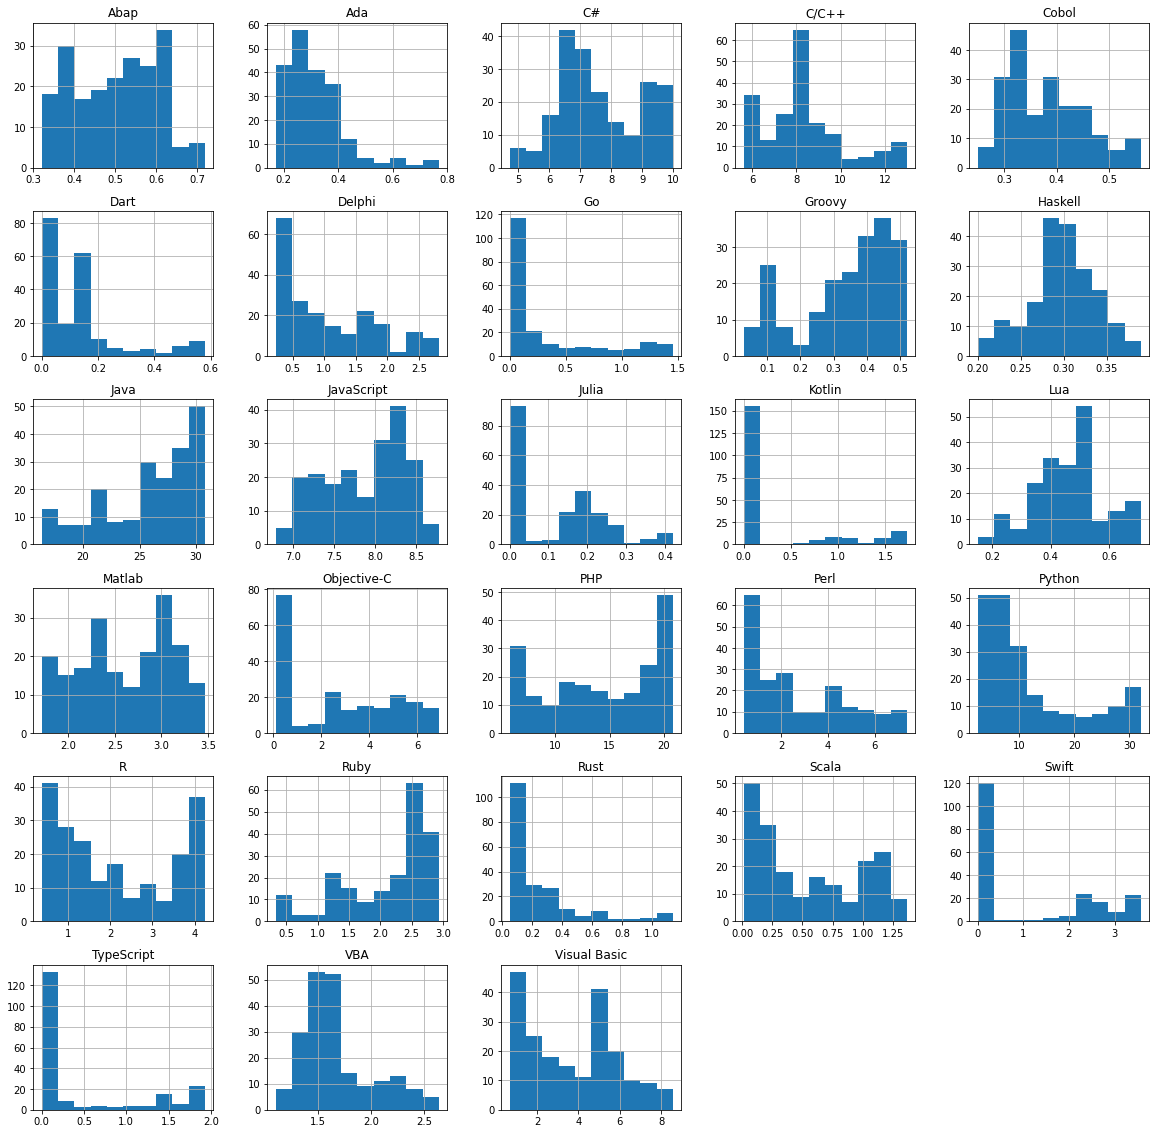

In [44]:
df.hist()
configurar_plot_com_dimensoes('Histograma Linguagens', '', '', 20, 20)
plt.show()

In [50]:
def createDataFrameFor(df, colunas, colunaAtual):
    return pd.DataFrame(
        {
            'Date': df.Date,
            'Year': pd.DatetimeIndex(df['Date']).year,
            'Timestamp': map(lambda i : datetime.strptime(df["Date"][i], '%B %Y'), range(len(df.Date))),
            'Language': colunas[colunaAtual],
            'Value': df[df.columns[colunaAtual]]
        }
    )

colunas = df.columns

dados_tratados = createDataFrameFor(df, colunas, 1)

for coluna in range(1, len(colunas)):
    dados_tratados = pd.concat([dados_tratados, createDataFrameFor(df, colunas, coluna)])

dados_tratados.reset_index(drop=True, inplace=True)

dados_tratados['UnixTime'] = list(map(lambda i: (pd.to_datetime([dados_tratados['Timestamp'][i]]).astype(int) / 10**9)[0], range(len(dados_tratados['Date']))))

dados_tratados.head()

,Date,Year,Timestamp,Language,Value,UnixTime
0,July 2004,2004,2004-07-01,Abap,0.34,1.088640e+09
1,August 2004,2004,2004-08-01,Abap,0.36,1.091318e+09
2,September 2004,2004,2004-09-01,Abap,0.41,1.093997e+09
3,October 2004,2004,2004-10-01,Abap,0.40,1.096589e+09
4,November 2004,2004,2004-11-01,Abap,0.38,1.099267e+09


In [51]:
dados_tratados.to_csv('dados/Dados.csv')

In [92]:
dados_agrupados = dados_tratados[['Language', 'Value']].groupby(by=['Language'], as_index=False).sum()

dados_agrupados = dados_agrupados.sort_values(by=['Value'], ascending=False)

dados_agrupados

,Language,Value
10,Java,5265.13
17,PHP,2872.86
19,Python,2419.33
3,C/C++,1691.65
11,JavaScript,1598.16
2,C#,1543.45
27,Visual Basic,754.92
16,Objective-C,546.40
18,Perl,543.92
15,Matlab,531.17


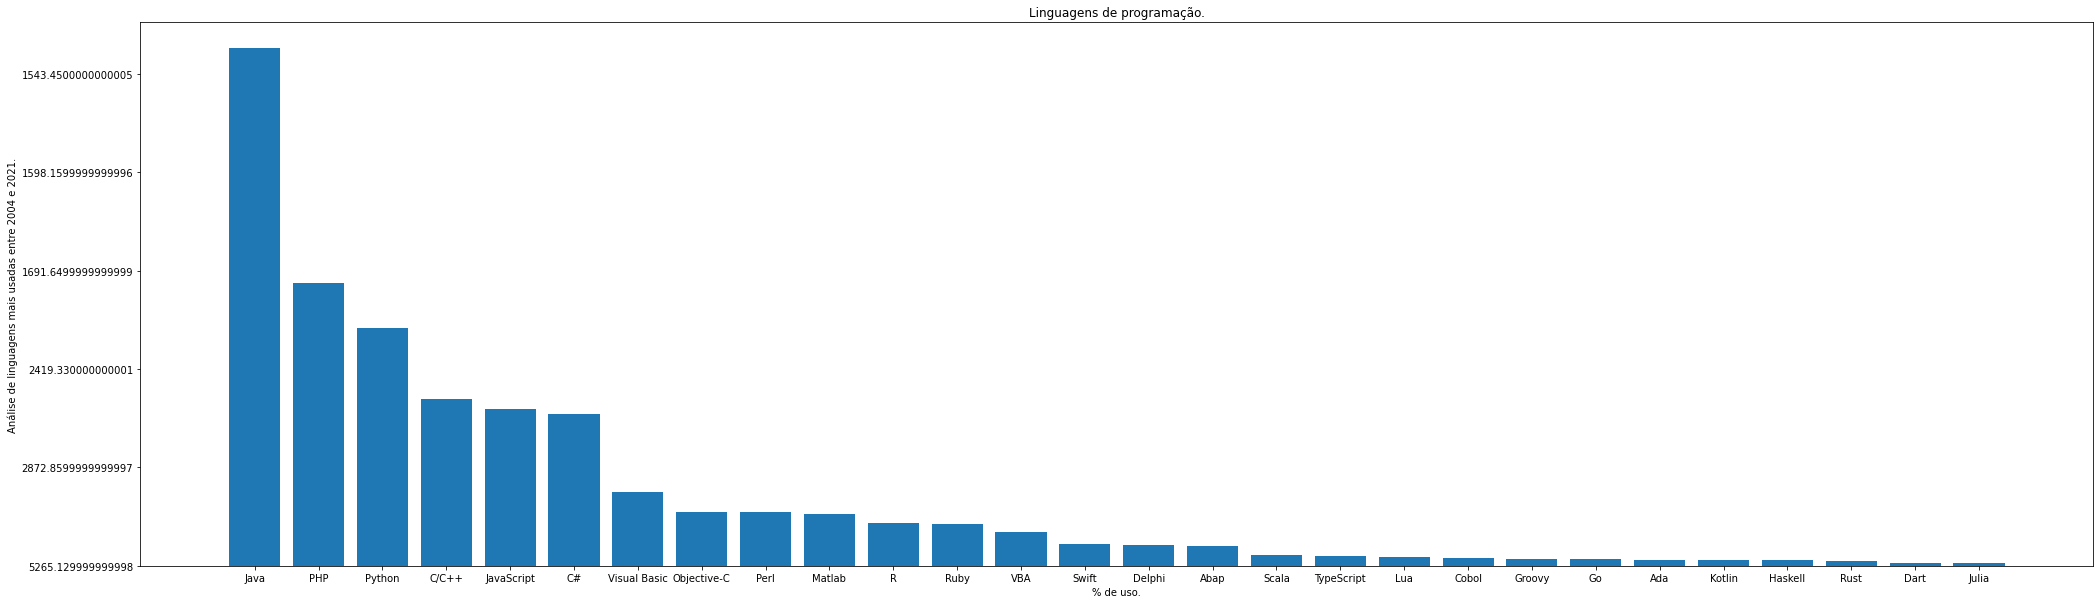

In [93]:
fig, ax = plt.subplots()

ax.set_xticklabels(dados_agrupados['Language'])
ax.set_yticklabels(dados_agrupados['Value'])

ax.bar(x = dados_agrupados['Language'], height = dados_agrupados['Value'])

configurar_plot_com_dimensoes(
    'Linguagens de programação.',
    '% de uso.',
    'Análise de linguagens mais usadas entre 2004 e 2021.',
    35, 
    10
)

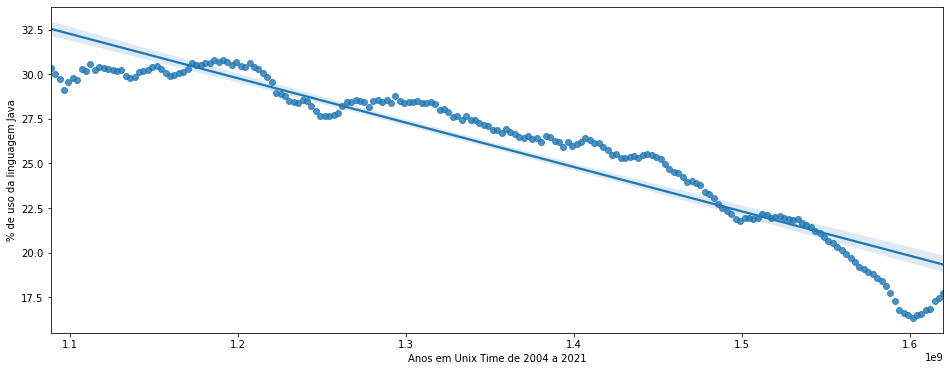

In [4]:
df_java = dados_tratados[dados_tratados['Language'] == 'Java']
sns.regplot(x="UnixTime", y="Value", data= df_java)
plt.gcf().set_size_inches(16, 6)
plt.ylabel('% de uso da linguagem Java')
plt.xlabel('Anos em Unix Time de 2004 a 2021')
plt.show()

In [5]:
def prever_regressao_linguagem(linguagem):
    df_linguagem = dados_tratados[dados_tratados['Language'] == linguagem]

    X = df_linguagem.UnixTime.values.reshape(-1, 1)
    y = df_linguagem.Value.values.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    plt.scatter(X_test, y_test,  color='blue')
    plt.plot(X_test, y_pred, color='red', linewidth=3)

    plt.gcf().set_size_inches(16, 6)

    plt.ylabel('% de uso da linguagem {}'.format(linguagem))
    plt.xlabel('Anos em Unix Time de 2004 a 2021')

    plt.show()

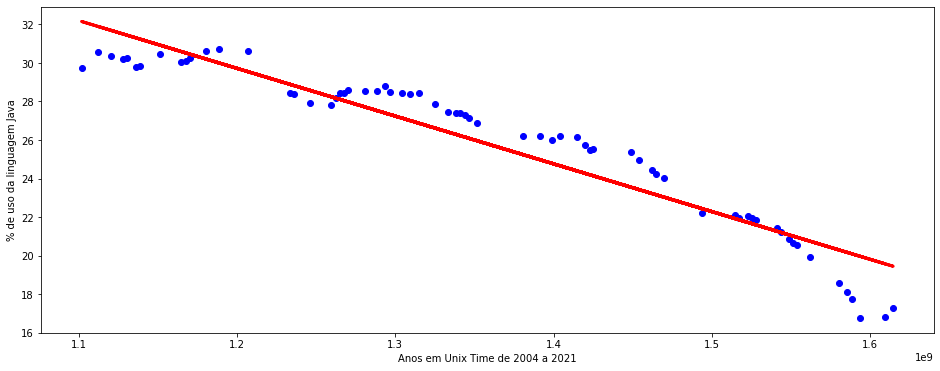

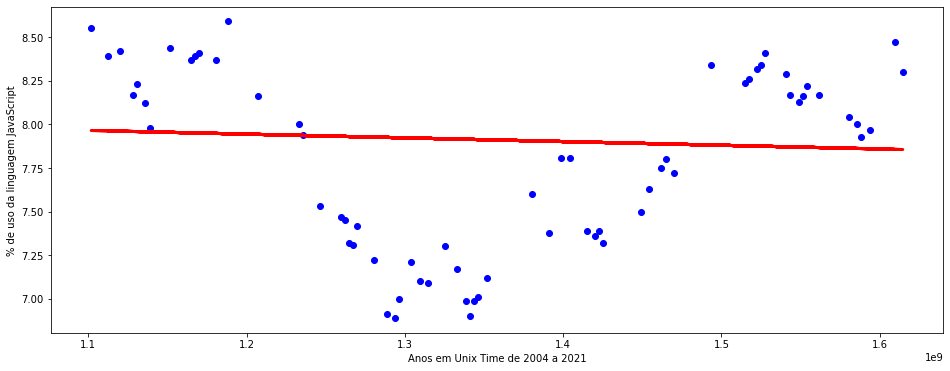

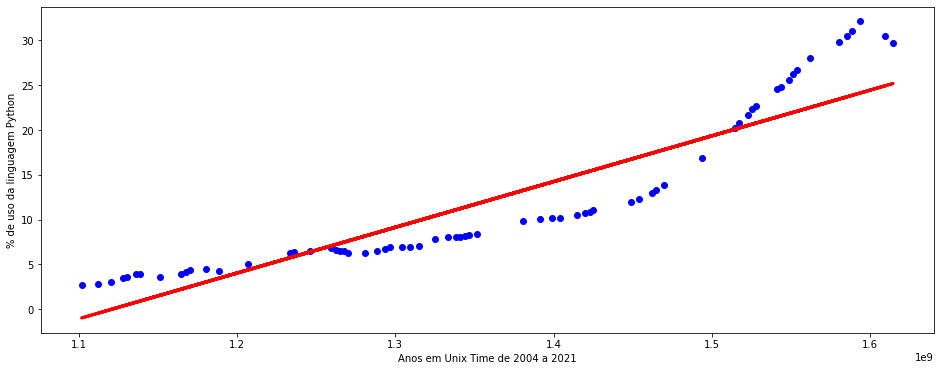

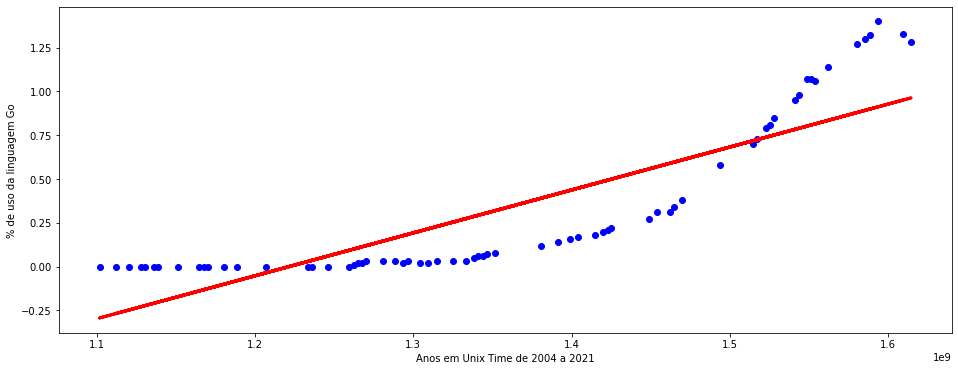

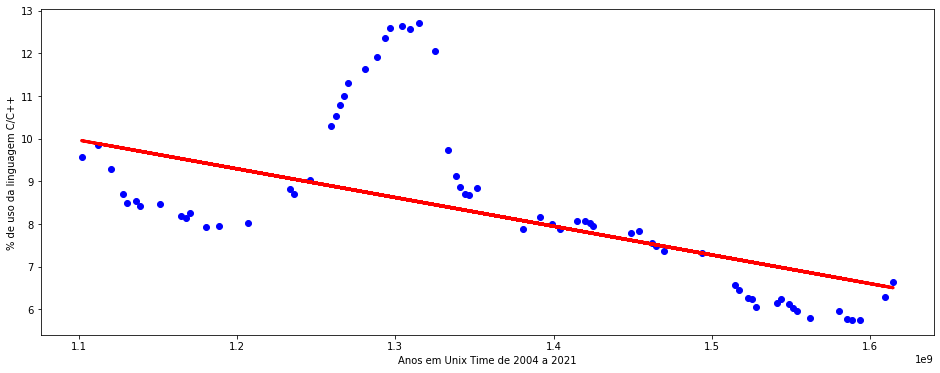

In [6]:
prever_regressao_linguagem('Java')
prever_regressao_linguagem('JavaScript')
prever_regressao_linguagem('Python')
prever_regressao_linguagem('Go')
prever_regressao_linguagem('C/C++')

In [7]:
dados = df
dados.head()

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.34,0.36,10.08,4.71,0.43,0.0,2.82,0.0,0.03,...,18.75,2.53,0.39,0.33,0.08,0.03,0.0,0.0,1.44,8.56
1,August 2004,0.36,0.36,9.81,4.99,0.46,0.0,2.67,0.0,0.07,...,19.26,2.64,0.41,0.40,0.09,0.03,0.0,0.0,1.46,8.57
2,September 2004,0.41,0.41,9.63,5.06,0.51,0.0,2.65,0.0,0.08,...,19.49,2.72,0.40,0.41,0.10,0.03,0.0,0.0,1.55,8.41
3,October 2004,0.40,0.38,9.50,5.31,0.53,0.0,2.77,0.0,0.09,...,19.34,2.92,0.42,0.46,0.11,0.04,0.0,0.0,1.61,8.49
4,November 2004,0.38,0.38,9.52,5.24,0.55,0.0,2.76,0.0,0.07,...,19.43,2.84,0.41,0.45,0.13,0.04,0.0,0.0,1.50,8.24


In [8]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados.set_index('Date', inplace = True) 

dados.head()

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,Haskell,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
Date,,,,,,,,,,,,,,,,,,,,,
2004-07-01,0.34,0.36,10.08,4.71,0.43,0.0,2.82,0.0,0.03,0.22,...,18.75,2.53,0.39,0.33,0.08,0.03,0.0,0.0,1.44,8.56
2004-08-01,0.36,0.36,9.81,4.99,0.46,0.0,2.67,0.0,0.07,0.20,...,19.26,2.64,0.41,0.40,0.09,0.03,0.0,0.0,1.46,8.57
2004-09-01,0.41,0.41,9.63,5.06,0.51,0.0,2.65,0.0,0.08,0.21,...,19.49,2.72,0.40,0.41,0.10,0.03,0.0,0.0,1.55,8.41
2004-10-01,0.40,0.38,9.50,5.31,0.53,0.0,2.77,0.0,0.09,0.20,...,19.34,2.92,0.42,0.46,0.11,0.04,0.0,0.0,1.61,8.49
2004-11-01,0.38,0.38,9.52,5.24,0.55,0.0,2.76,0.0,0.07,0.24,...,19.43,2.84,0.41,0.45,0.13,0.04,0.0,0.0,1.50,8.24


In [15]:
dados[].describe()

count    17461.000000
mean         0.028533
std          0.076522
min          0.000000
25%          0.000000
50%          0.000000
75%          0.016990
max          1.000000
Name: java, dtype: float64

In [ ]:
dados.plot().

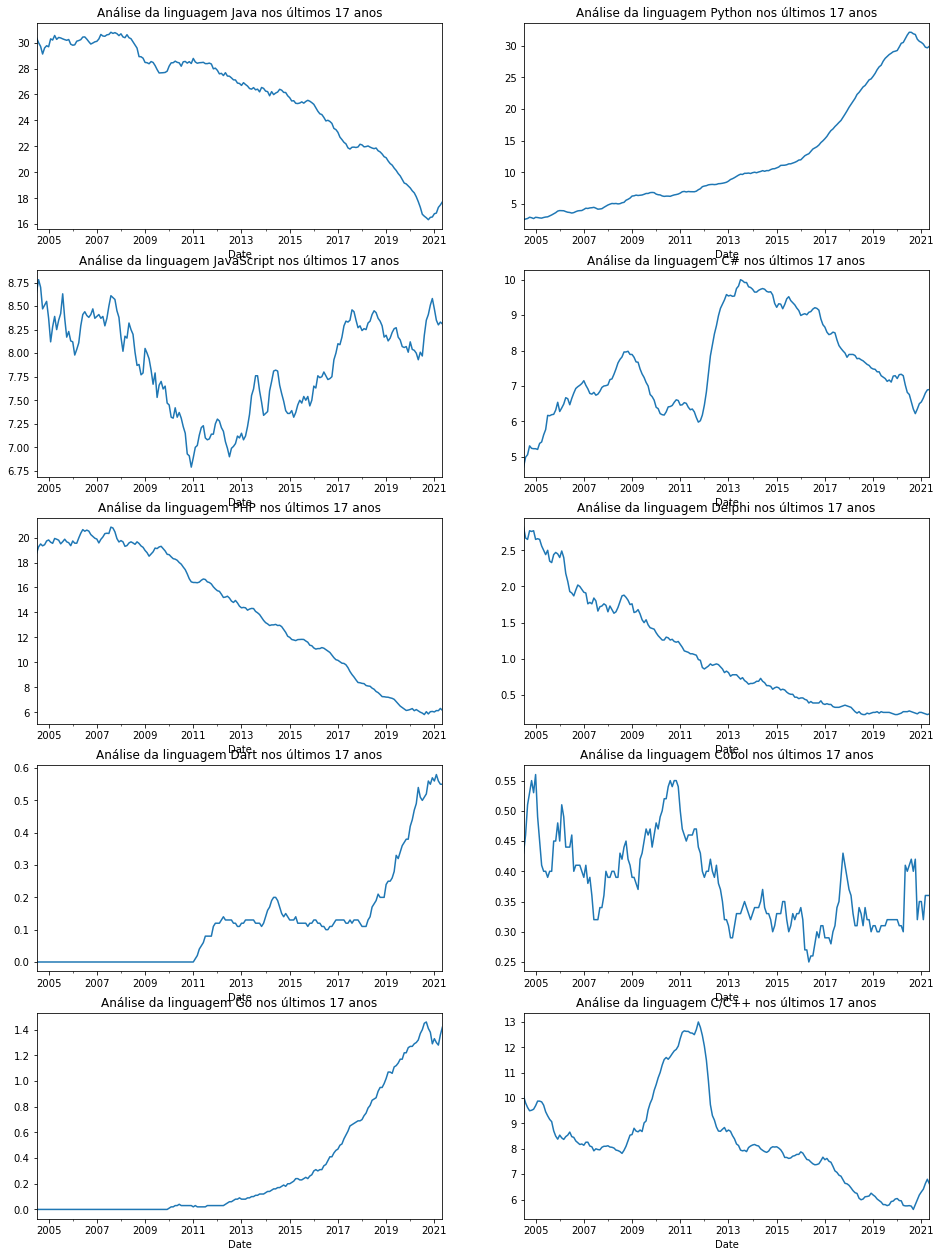

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=2)

dados['Java'].plot(ax=axes[0,0], title = "Análise da linguagem Java nos últimos 17 anos")
dados['JavaScript'].plot(ax=axes[1,0], title = "Análise da linguagem JavaScript nos últimos 17 anos")
dados['Python'].plot(ax=axes[0,1], title = "Análise da linguagem Python nos últimos 17 anos")
dados['C#'].plot(ax=axes[1,1], title = "Análise da linguagem C# nos últimos 17 anos")
dados['PHP'].plot(ax=axes[2,0], title = "Análise da linguagem PHP nos últimos 17 anos")
dados['Delphi'].plot(ax=axes[2,1], title = "Análise da linguagem Delphi nos últimos 17 anos")
dados['Dart'].plot(ax=axes[3,0], title = "Análise da linguagem Dart nos últimos 17 anos")
dados['Cobol'].plot(ax=axes[3,1], title = "Análise da linguagem Cobol nos últimos 17 anos")
dados['Go'].plot(ax=axes[4,0], title = "Análise da linguagem Go nos últimos 17 anos")
dados['C/C++'].plot(ax=axes[4,1], title = "Análise da linguagem C/C++ nos últimos 17 anos")

plt.gcf().set_size_inches(16, 22)

plt.savefig('Comparação linguagens 17 anos')
plt.show()

# Analisando dados de 2017

In [10]:
dados = pd.read_csv('dados/user-languages.csv')
dados.head()

,user_id,assembly,batchfile,c,c#,c++,clojure,coffeescript,css,elixir,...,yeoman-generator,yii,yii2,youtube,zephir,zero-configuration,zeromq,zookeeper,zsh,zsh-configuration
0,007lva,0.0,0.0,0.0,0.0000,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,06wj,0.0,0.0,0.0,0.0171,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0bserver07,0.0,0.0,0.0,0.0000,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0rca,0.0,0.0,0.0,0.0000,0.00000,0.252336,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0x00A,0.0,0.0,0.0,0.0000,0.10231,0.000000,0.0,0.005776,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Colunas disponíveis:

In [11]:
len(dados.columns)

1411

In [12]:
list(dados.columns)

['user_id',
 'assembly',
 'batchfile',
 'c',
 'c#',
 'c++',
 'clojure',
 'coffeescript',
 'css',
 'elixir',
 'emacs lisp',
 'go',
 'haskell',
 'html',
 'java',
 'javascript',
 'jupyter notebook',
 'kotlin',
 'lua',
 'matlab',
 'objective-c',
 'objective-c++',
 'ocaml',
 'perl',
 'php',
 'powershell',
 'purebasic',
 'python',
 'rascal',
 'ruby',
 'rust',
 'scala',
 'shell',
 'swift',
 'tex',
 'typescript',
 'vim script',
 'vue',
 '1-wire',
 '2d',
 '3d',
 '3d-engine',
 '3d-game-engine',
 'accessibility',
 'accordion',
 'acme',
 'acme-client',
 'activejob',
 'activerecord',
 'activity',
 'activity-stream',
 'actor-model',
 'adc',
 'addons',
 'admin',
 'admin-dashboard',
 'admin-template',
 'admin-theme',
 'admin-ui',
 'ado-net',
 'adobe',
 'after-effects',
 'ag',
 'agc',
 'agent',
 'airbnb',
 'airtable',
 'akka',
 'alarm',
 'alerting',
 'algorithm',
 'algorithm-challenges',
 'algorithm-competitions',
 'alignment',
 'amd',
 'analytics',
 'android',
 'android-application',
 'android-archite

In [13]:
dados[['user_id', 'java']]

,user_id,java
0,007lva,0.015326
1,06wj,0.000000
2,0bserver07,0.000000
3,0rca,0.018692
4,0x00A,0.000000
...,...,...
17456,zztczcx,0.000000
17457,zzuwangfeng,0.021480
17458,zzz40500,0.375372
17459,zzzhc,0.051613
